In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt

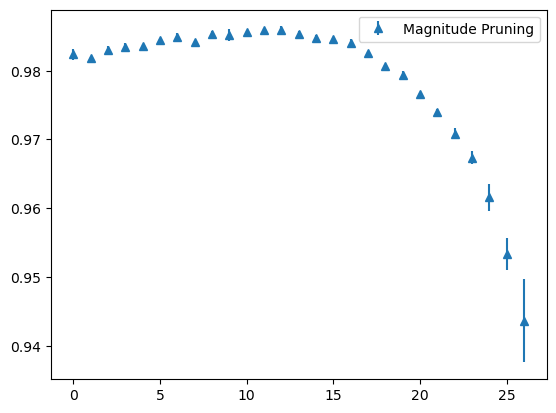

In [2]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_2f4be23b7e4c30fb5fbf086d41cfacb7/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        test_accuracies = my_data[my_data.a=='test_accuracy']
        col = "c"
        val= test_accuracies.loc[test_accuracies[col].idxmax()].c
        vals.append(val)
    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_mag = means
stds_mag = stds
x_mag = x
plt.errorbar(x, means, stds, linestyle='None', marker='^', label='Magnitude Pruning')
plt.legend()
plt.show()

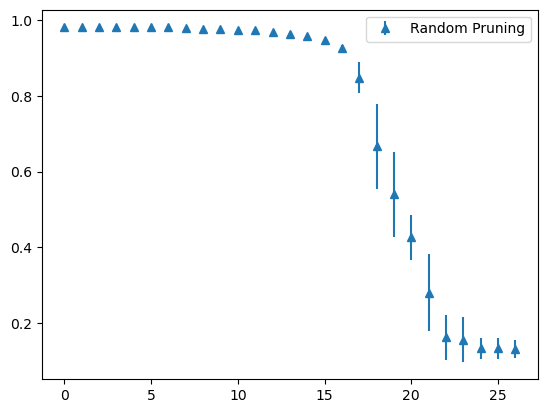

In [3]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_3792c36a54808af5d03e5d556b4ab357/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        test_accuracies = my_data[my_data.a=='test_accuracy']
        col = "c"
        val= test_accuracies.loc[test_accuracies[col].idxmax()].c
        vals.append(val)
    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_rand = means
stds_rand = stds
x_rand = x

plt.errorbar(x, means, stds, linestyle='None', marker='^', label='Random Pruning')
plt.legend()
plt.show()

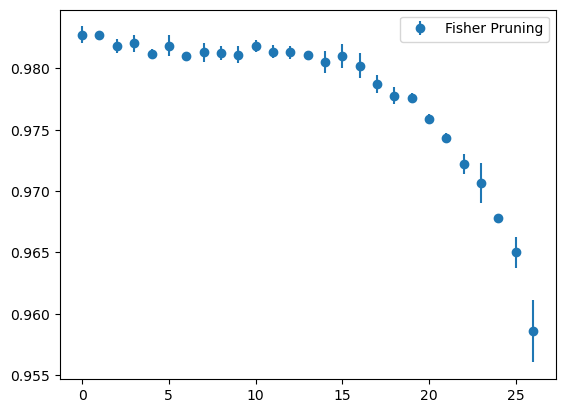

In [4]:
means = np.array([])
stds = np.array([])
x = np.arange(0,27,1)

for levl in range(0, 27):
    vals = []
    for repl in range(1,4):
        my_data = pd.read_csv('../open_lth_data/lottery_a36edb229aed327b8e25e0685c350491/replicate_' + str(repl) + '/level_'+str(levl)+'/main/logger', header=None)
        my_data.columns = ['a', 'b', 'c']
        test_accuracies = my_data[my_data.a=='test_accuracy']
        col = "c"
        val= test_accuracies.loc[test_accuracies[col].idxmax()].c
        vals.append(val)
    means = np.append(means,np.mean(vals))
    stds = np.append(stds, np.std(vals))

means_fish = means
stds_fish = stds
x_fish = x
plt.errorbar(x, means, stds, linestyle='None', marker='o', label='Fisher Pruning')
#plt.errorbar(x, means, stds, linestyle='None', marker='o', label='Fisher Pruning - 1')

plt.legend()
plt.show()

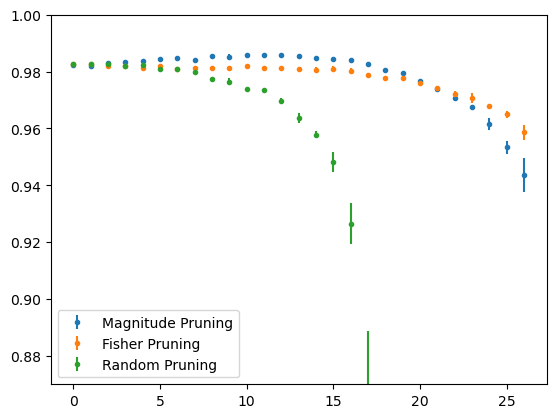

In [5]:
plt.errorbar(x_mag, means_mag, stds_mag, linestyle='None', marker='.', label='Magnitude Pruning')
plt.errorbar(x_fish, means_fish, stds_fish, linestyle='None', marker='.', label='Fisher Pruning')
plt.errorbar(x_rand, means_rand, stds_rand, linestyle='None', marker='.', label='Random Pruning')
plt.ylim([0.87, 1])

plt.legend()
plt.show()